In [1]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from csv file and load into data frame
df = pd.read_csv("./loan.csv", low_memory=False)

In [3]:
# check the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# get the information about data like number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# in loan_status column value of 'current' means the customer is still paying the loan and it will not
# give any insight for loan approval so removing those records where value is 'Current'
df = df[df['loan_status'] != 'Current'].reset_index(drop=True)
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [6]:
# get the information about data like number of rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 32.7+ MB


In [7]:
# get the count and column names of numeric columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print("Numeric columns lenth: ", len(num_cols))

Numeric columns lenth:  87


In [8]:
# get the count and column names of categorical
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns lenth: ", len(cat_cols))

Categorical columns lenth:  24


### Data Cleaning

#### Numeric Data gathereing and cleaning

In [9]:
# Now separate numeric and categorical data
# store numeric data in 'df_num_data' data frame
df_num_data = df[num_cols]
df_num_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075269,1311441,5000,5000,5000.0,156.46,36000.0,11.20,0,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
# analyse the numeric data
df_num_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [11]:
# by seeing the above data id and member_id will not give any insights for processing loan
# so deleteing those columns
df_num_data = df_num_data.drop(columns=['id', 'member_id'])
df_num_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.0,162.87,24000.0,27.65,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,59.83,30000.0,1.00,0,5,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
# as we can see there are some null values is there in data so get the null value counts for each column
df_num_data.isnull().sum(axis = 0)

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
installment                       0
annual_inc                        0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 85, dtype: int64

In [13]:
# get the missing percent for every column and select a criteria to drop that column
missing_percent = [(df_num_data[col].isnull().sum()*100)/len(df_num_data) for col in df_num_data.columns]
for x in missing_percent:
    print(x, end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 64.55919330170828 92.8973222386396 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.14516421702050444 100.0 0.0 100.0 100.0 100.0 0.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 0.14516421702050444 0.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 1.8067760582730643 0.10109650828213702 100.0 100.0 100.0 100.0 

In [14]:
# by seeing the above information most of the columns having lot of missing values and 
# they dont make any significance in the analysis
# So I am removing the columns where missing perrcentage > 50

# form data frame with col names and missing percentages
df_missing_percent = pd.DataFrame({'cols': df_num_data.columns,
                                 'missing_percent': missing_percent})
df_missing_percent.head()

,cols,missing_percent
0,loan_amnt,0.0
1,funded_amnt,0.0
2,funded_amnt_inv,0.0
3,installment,0.0
4,annual_inc,0.0


In [15]:
# form new data frame where missing values percent is less than or equal 50
# i.e, removing the columns where missing values percent is greater than 50 percent and storing those values in
# new dataframe wiith 'final_columns'
final_columns = [col for i, col in enumerate(list(df_missing_percent.cols)) if df_missing_percent['missing_percent'][i] <=50]
print(len(final_columns))

29


In [16]:
# by doing above thing out of 87 columns we got only 29 columns
# now get the data only for these 29 cols
df_num_data_final_data = df[final_columns]
df_num_data_final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,162.87,24000.0,27.65,0,1,3,0,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,59.83,30000.0,1.00,0,5,3,0,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,84.33,12252.0,8.72,0,2,2,0,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,339.31,49200.0,20.00,0,1,10,0,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,5000,5000,5000.0,156.46,36000.0,11.20,0,3,9,0,...,0.00,0.00,161.03,0.0,1,0,0.0,0,0.0,0.0


In [17]:
# again check missing percentage of each column
missing_per = [(df_num_data_final_data[col].isnull().sum()*100)/len(df_num_data_final_data) for col in df_num_data_final_data.columns]
for x in missing_per:
    print(x, end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.14516421702050444 0.0 0.0 0.14516421702050444 0.0 1.8067760582730643 0.10109650828213702 

Till this step I have done the identifying the missing values and removed the columns where missing percent is >50
still we can see for some columns missing values is there. That imputation i will do it after analysing the categorical data

#### Categorical Data Gathering and Data Cleaning

In [18]:
# get categorical data and store in 'df_cat_data' data frame
df_cat_data = df[cat_cols]
df_cat_data.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,NaN,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,NaN,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,personel,917xx,CA,Feb-96,21%,f,Jan-15,NaN,Apr-16,INDIVIDUAL
4,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,...,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,NaN,Jan-16,INDIVIDUAL


In [19]:
# Now look into catergorical data and get the missing values count
df_cat_data.isnull().sum(axis = 0)

term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12527
purpose                    0
title                     11
zip_code                   0
addr_state                 0
earliest_cr_line           0
revol_util                50
initial_list_status        0
last_pymnt_d              71
next_pymnt_d           38577
last_credit_pull_d         2
application_type           0
dtype: int64

In [20]:
# get the missing percent for every column and select a criteria to drop that column
missing_percent_cat = [(df_cat_data[col].isnull().sum()*100)/len(df_cat_data) for col in df_cat_data.columns]
for x in missing_percent_cat:
    print(x, end=' ')

0.0 0.0 0.0 0.0 6.185032532337922 2.677761360396091 0.0 0.0 0.0 0.0 0.0 0.0 32.472716903854625 0.0 0.028514399771884802 0.0 0.0 0.0 0.12961090805402184 0.0 0.18404748943671098 100.0 0.005184436322160873 0.0 

In [21]:
# by seeing the above data column 'next_pymnt_d' is having 100percent missing values so removing that column
df_cat_data = df_cat_data.drop(columns=['next_pymnt_d'])
df_cat_data.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL


In [22]:
# after exploring the categorical data 'emp_title', 'url', 'pymnt_plan', 'initial_list_status' , 'zip_code' 'addr_state',
# 'application_type', 'earliest_cr_line', 'revol_util', 'last_credit_pull_d' columns is not useful for insights.
# So I am removing these columns
# also 'desc' column and 'title' column is covered under 'purpose' column so i am removing these columns also
# remove unwnted columns from categorical data frame
df_cat_data = df_cat_data.drop(columns=['emp_title', 'url', 'pymnt_plan', 'initial_list_status',
                                        'zip_code', 'addr_state', 'application_type',
                                        'earliest_cr_line', 'revol_util', 'last_credit_pull_d', 'desc', 'title'])
df_cat_data.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,last_pymnt_d
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-15
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,Apr-13
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,Jun-14
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,Jan-15
4,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,Jan-15


In [23]:
# as you can see in above emp_length is not in proper format
# so removing the unwanted data from thet column records
# "emp_length" <1 year is assumed as 0 and 10+ years is assumed as 10
df_cat_data['emp_length'] = df_cat_data['emp_length'].fillna('-1 Years')
df_cat_data['emp_length'] = df_cat_data['emp_length'].apply(lambda x: 0 if "<" in str(x) else (str(x).split('+')[0] if "+" in str(x) else str(x).split(" ")[0]))

df_cat_data['emp_length'].value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
-1    1033
Name: emp_length, dtype: int64

In [24]:
# Treat missing values for categorical variables before transformation
# as mode will be used to treat the missin values for categorical so I am also using mode to treat missing values
df_cat_data = df_cat_data[df_cat_data.columns].apply(lambda x: x.fillna(x.mode))
df_cat_data.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,last_pymnt_d
0,36 months,10.65%,B,B2,10,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-15
1,60 months,15.27%,C,C4,0,RENT,Source Verified,Dec-11,Charged Off,car,Apr-13
2,36 months,15.96%,C,C5,10,RENT,Not Verified,Dec-11,Fully Paid,small_business,Jun-14
3,36 months,13.49%,C,C1,10,RENT,Source Verified,Dec-11,Fully Paid,other,Jan-15
4,36 months,7.90%,A,A4,3,RENT,Source Verified,Dec-11,Fully Paid,wedding,Jan-15


In [25]:
# get the missing percent for every column and select a criteria to drop that column
missing_percent_cat = [(df_cat_data[col].isnull().sum()*100)/len(df_cat_data) for col in df_cat_data.columns]
for x in missing_percent_cat:
    print(x, end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [26]:
df_cat_data['emp_length'] = df_cat_data['emp_length'].replace('-1', df_cat_data['emp_length'].mode()[0])
df_cat_data['emp_length'].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [27]:
# by seeing the above data below are my some of observation where we can do data transformation
# columns 'term', 'int_rate',  'emp_length' can be converted to numeric columns

# implementing the above conditions
df_num_data_final_data['term_months'] = pd.to_numeric(df_cat_data['term'].apply(lambda x: x.replace('months', '')))
df_num_data_final_data['int_rate_percent'] = pd.to_numeric(df_cat_data['int_rate'].apply(lambda x: x.replace('%', '')))
df_num_data_final_data['emp_length'] = pd.to_numeric(df_cat_data['emp_length'])

C:\Users\Naga\AppData\Local\Temp/ipykernel_9420/3562744948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_data_final_data['term_months'] = pd.to_numeric(df_cat_data['term'].apply(lambda x: x.replace('months', '')))
C:\Users\Naga\AppData\Local\Temp/ipykernel_9420/3562744948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_data_final_data['int_rate_percent'] = pd.to_numeric(df_cat_data['int_rate'].apply(lambda x: x.replace('%', '')))
C:\Users\Naga\AppData\Local\Temp/ipykernel_9420/356274

In [28]:
df_num_data_final_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'term_months', 'int_rate_percent',
       'emp_length'],
      dtype='object')

In [29]:
# remove the converted columns from categorical data
df_cat_data = df_cat_data.drop(columns=['term', 'int_rate', 'emp_length'])

#### Imputing missing values in numerical data

In [30]:
# get th numerical data columns names
df_num_data_final_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'term_months', 'int_rate_percent',
       'emp_length'],
      dtype='object')

In [31]:
# describe the numerical data t understand further
df_num_data_final_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percent,emp_length
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,...,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,...,0.0,1.0,0.0,0.0,0.0,0.043479,0.0,41.898437,11.932219,5.076445
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,...,0.0,0.0,0.0,0.0,0.0,0.204583,0.0,10.333136,3.691327,3.602917
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,5.420000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,8.940000,2.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,11.710000,4.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,14.380000,9.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,60.000000,24.400000,10.000000


In [32]:
# describing the non-visible column from the above list
data = df_num_data_final_data[['revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee']]
data.describe()

,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
count,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634
std,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880
min,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000
50%,8762.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000
75%,16912.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000
max,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000


In [33]:
# from the above it is observed that some of the columns are not giving any insights as all the values are same and some are 
# belongs customer behavioural so removing all those columns
df_num_data_final_data = df_num_data_final_data.drop(columns=['delinq_2yrs', 'inq_last_6mths', 'open_acc',
                                                              'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
                                                              'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                                                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                                                              'recoveries', 'collection_recovery_fee',
                                                              'last_pymnt_amnt', 'collections_12_mths_ex_med',
                                                              'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
                                                              'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'])

In [34]:
# describe the numerical data t understand further
df_num_data_final_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,term_months,int_rate_percent,emp_length
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,41.898437,11.932219,5.076445
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,10.333136,3.691327,3.602917
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,36.000000,5.420000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,36.000000,8.940000,2.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,36.000000,11.710000,4.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,36.000000,14.380000,9.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,60.000000,24.400000,10.000000


In [35]:
# get the list of numerical columns
df_num_data_final_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'term_months', 'int_rate_percent', 'emp_length'],
      dtype='object')

In [36]:
# now fill missing values of columns with median. As median is not sensitive to outliers.
df_num_data_final_data = df_num_data_final_data[df_num_data_final_data.columns].apply(lambda x: x.fillna(x.median))
df_num_data_final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,term_months,int_rate_percent,emp_length
0,5000,5000,4975.0,162.87,24000.0,27.65,36,10.65,10
1,2500,2500,2500.0,59.83,30000.0,1.00,60,15.27,0
2,2400,2400,2400.0,84.33,12252.0,8.72,36,15.96,10
3,10000,10000,10000.0,339.31,49200.0,20.00,36,13.49,10
4,5000,5000,5000.0,156.46,36000.0,11.20,36,7.90,3


In [37]:
# get the missing percent for every column
missing_percent = [(df_num_data_final_data[col].isnull().sum()*100)/len(df_num_data_final_data) 
                   for col in df_num_data_final_data.columns]
for x in missing_percent:
    print(x, end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [38]:
# as you can see above there is no missing values for all the numeric columns

As of now I worked on separately for cleaning numeric and categorical variables and for imputation.
Now I am merging those two data into single data frame for univariate and bi-variate analysis

In [39]:
# combine both numeric and categorical data frame
df_loans = pd.concat([df_num_data_final_data, df_cat_data], axis=1)

In [40]:
# check the data
df_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,term_months,int_rate_percent,emp_length,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,last_pymnt_d
0,5000,5000,4975.0,162.87,24000.0,27.65,36,10.65,10,B,B2,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-15
1,2500,2500,2500.0,59.83,30000.0,1.00,60,15.27,0,C,C4,RENT,Source Verified,Dec-11,Charged Off,car,Apr-13
2,2400,2400,2400.0,84.33,12252.0,8.72,36,15.96,10,C,C5,RENT,Not Verified,Dec-11,Fully Paid,small_business,Jun-14
3,10000,10000,10000.0,339.31,49200.0,20.00,36,13.49,10,C,C1,RENT,Source Verified,Dec-11,Fully Paid,other,Jan-15
4,5000,5000,5000.0,156.46,36000.0,11.20,36,7.90,3,A,A4,RENT,Source Verified,Dec-11,Fully Paid,wedding,Jan-15


## Univariate Analysis

In [41]:
# get numeric and categorical variable names for univariate analysis
num_cols_loans = [col for col in df_loans.columns if df_loans[col].dtype != 'object']
cat_cols_loans = [col for col in df_loans.columns if df_loans[col].dtype == 'object']
print(num_cols_loans)
print(len(num_cols_loans))
print(cat_cols_loans)
print(len(cat_cols_loans))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'term_months', 'int_rate_percent', 'emp_length']
9
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'last_pymnt_d']
8


#### plotting Numeric variables

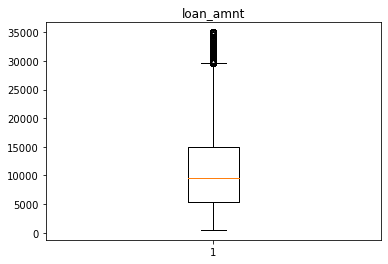

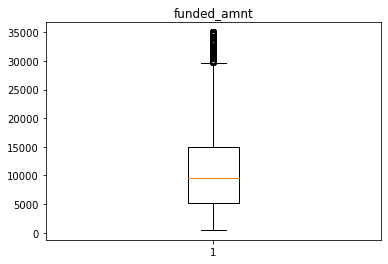

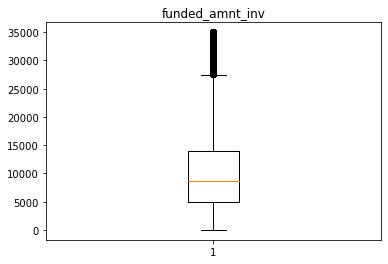

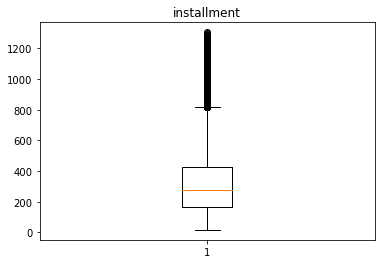

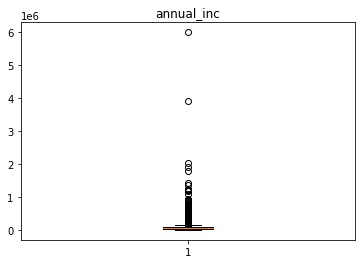

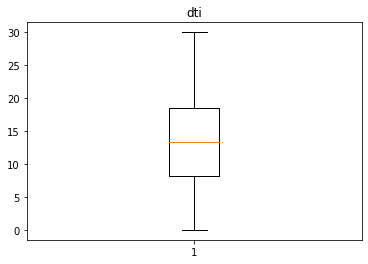

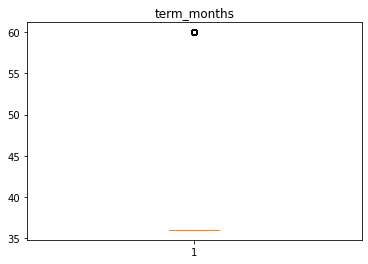

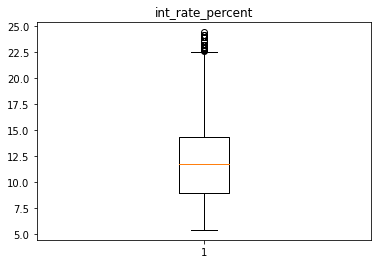

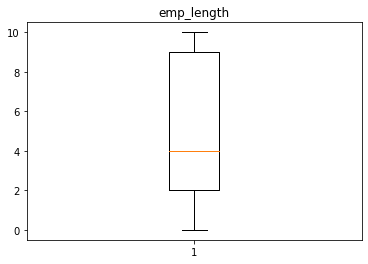

In [42]:
# plot all the numric variables with box plot and see for outliers
for col in num_cols_loans:
    plt.title(col)
    plt.boxplot(df_loans[col])
    plt.show()

In [43]:
# from the above plots there are more outliers in the annual_inc parameter compare to the other parameters
# so treating annual_inc column

##### Outlier treatment for numeric data

In [44]:
# ouliers treatment for annual income
# to see the varince first get the auantile ranges for annual income.
quantile_info = df_loans.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [45]:
# from the above table we can see after 0.95 there is variation in annual income
# so filtering the data below or equal to 95 percentile
df_loans = df_loans[df_loans['annual_inc'] <= df_loans['annual_inc'].quantile(0.95)]

In [46]:
# get shape of data frame
df_loans.shape

(36654, 17)

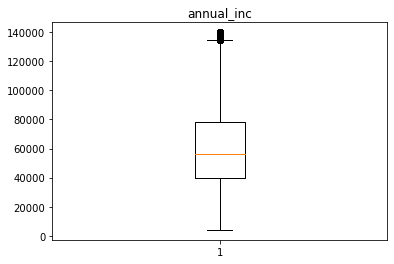

In [47]:
# plot annual income
plt.title('annual_inc')
plt.boxplot(df_loans['annual_inc'])
plt.show()

#### ploting categorical variables

IN this section i will plot and look into the results of defaulters as it will give some insights

In [48]:
#get categorical variable names
cat_cols_loans

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'last_pymnt_d']

<AxesSubplot:xlabel='grade', ylabel='count'>

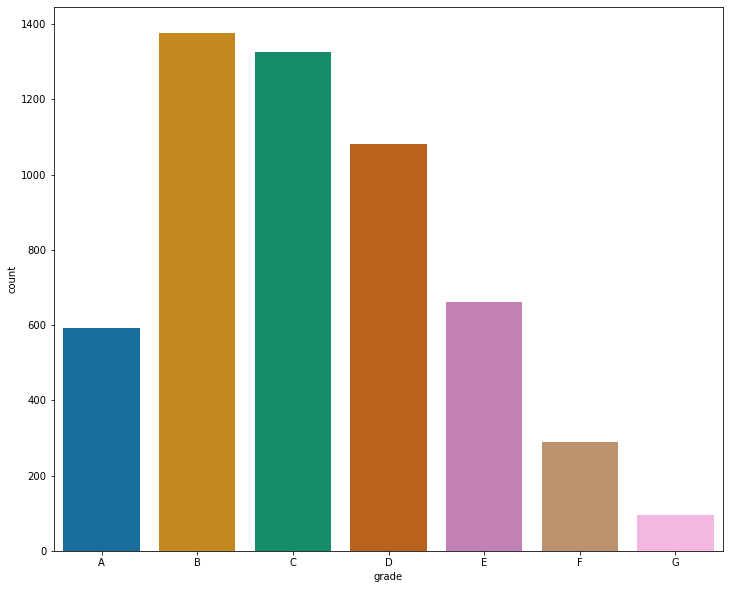

In [106]:
# plot grades
plt.figure(figsize=(12,10))
sns.countplot(x='grade', data=df_loans[df_loans['loan_status']=='Charged Off'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [50]:
# we have grade infromation in column grades so removing the grades in sub_grade and keeping only numeric values
df_loans['sub_grade'] = pd.to_numeric(df_loans['sub_grade'].apply(lambda x: x[-1]))

<AxesSubplot:xlabel='grade', ylabel='count'>

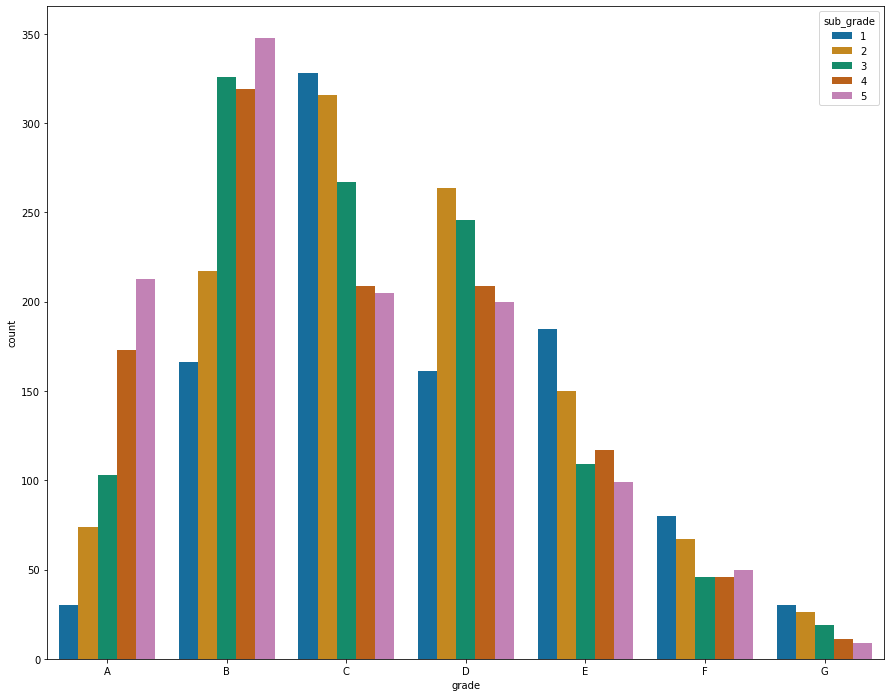

In [51]:
fig, ax = plt.subplots(figsize=(15,12))
sns.set_palette('colorblind')
sns.countplot(x='grade', data=df_loans[df_loans['loan_status']=='Charged Off'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

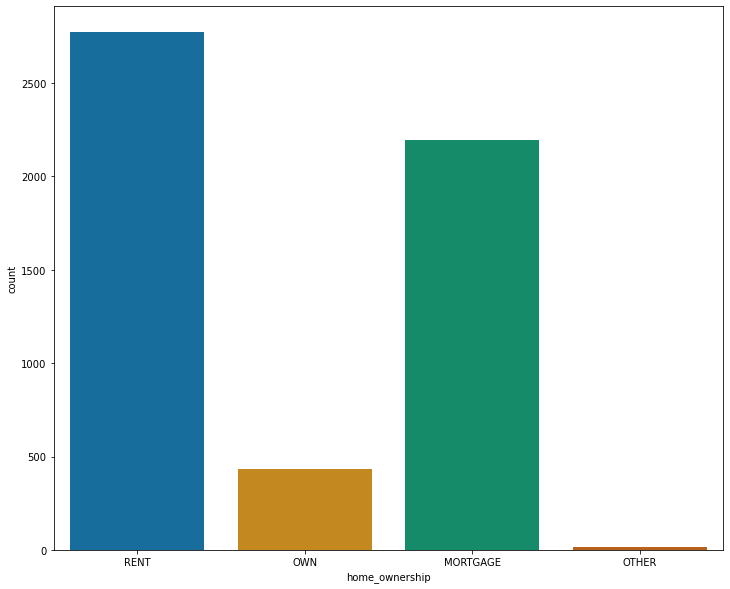

In [105]:
# plot home_ownership
plt.figure(figsize=(12,10))
sns.countplot(x='home_ownership', data=df_loans[df_loans['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

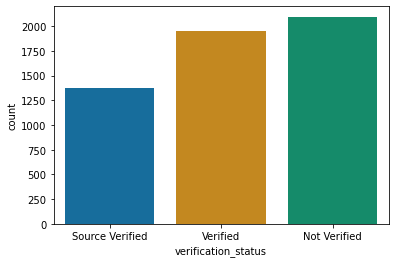

In [53]:
# plot verification_status
sns.countplot(x='verification_status', data=df_loans[df_loans['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

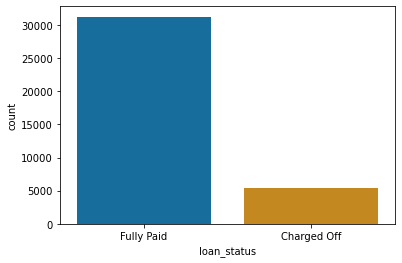

In [54]:
# plot loan_status
sns.countplot(x='loan_status', data=df_loans)

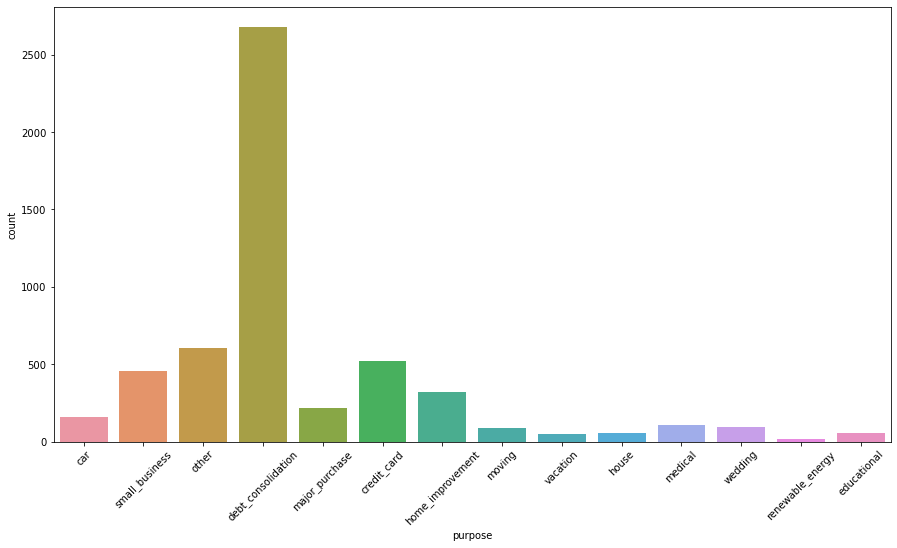

In [55]:
# plot purpose
plt.figure(figsize=(15,8))
sns.countplot(x='purpose', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.tick_params(axis='x', rotation=45)

In [56]:
# Analyzing by issued month and year
## get month and year from issue_d column
df_month_year = df_loans['issue_d'].str.partition("-", True)     
df_loans['issue_month'] = df_month_year[0]                       
df_loans['issue_year'] = '20' + df_month_year[2]

In [57]:
# look into sample data
df_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,term_months,int_rate_percent,emp_length,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,last_pymnt_d,issue_month,issue_year
0,5000,5000,4975.0,162.87,24000.0,27.65,36,10.65,10,B,2,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-15,Dec,2011
1,2500,2500,2500.0,59.83,30000.0,1.00,60,15.27,0,C,4,RENT,Source Verified,Dec-11,Charged Off,car,Apr-13,Dec,2011
2,2400,2400,2400.0,84.33,12252.0,8.72,36,15.96,10,C,5,RENT,Not Verified,Dec-11,Fully Paid,small_business,Jun-14,Dec,2011
3,10000,10000,10000.0,339.31,49200.0,20.00,36,13.49,10,C,1,RENT,Source Verified,Dec-11,Fully Paid,other,Jan-15,Dec,2011
4,5000,5000,5000.0,156.46,36000.0,11.20,36,7.90,3,A,4,RENT,Source Verified,Dec-11,Fully Paid,wedding,Jan-15,Dec,2011


<AxesSubplot:xlabel='issue_month', ylabel='count'>

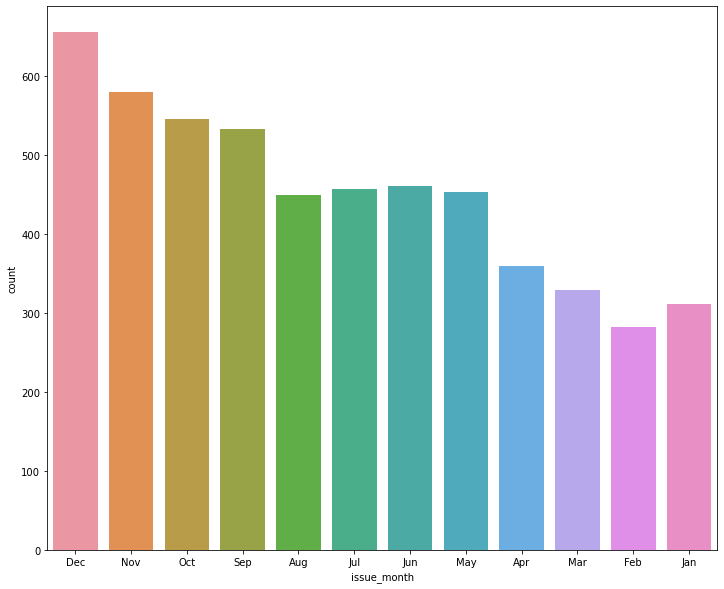

In [104]:
# plot issue month for 'Charged Off' customers
plt.figure(figsize=(12,10))
sns.countplot(x='issue_month', data=df_loans[df_loans['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='issue_year', ylabel='count'>

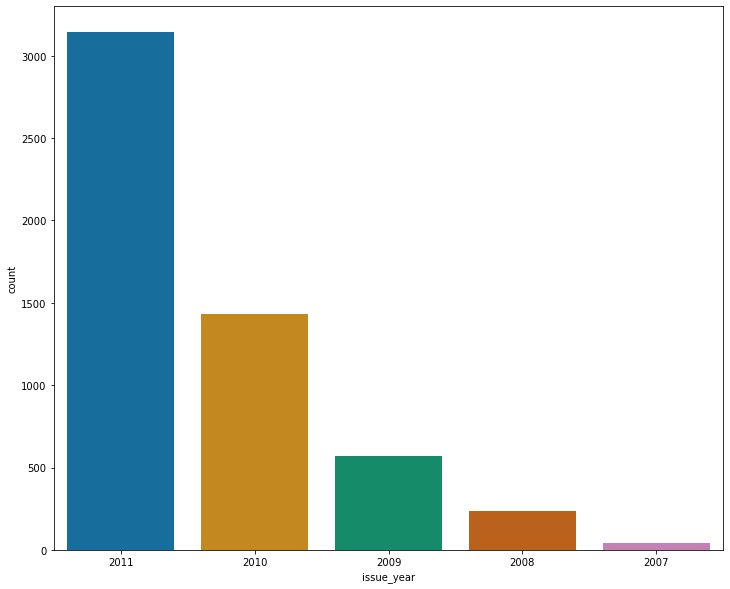

In [103]:
# plot issue_year for 'Charged Off' customers
plt.figure(figsize=(12,10))
sns.countplot(x='issue_year', data=df_loans[df_loans['loan_status']=='Charged Off'])

### Converting numerical varaibles into Categorical

In [60]:
# get in information of numeric columns
df_loans[num_cols_loans].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,term_months,int_rate_percent,emp_length
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000
mean,10682.249550,10436.144077,9894.181349,311.888682,60855.751621,13.446725,41.849075,11.888080,5.042396
std,7048.414166,6800.636737,6730.756232,199.230096,27750.284125,6.661899,10.303835,3.667257,3.595880
min,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,36.000000,5.420000,0.000000
25%,5000.000000,5000.000000,4975.000000,163.080000,40000.000000,8.350000,36.000000,8.940000,2.000000
50%,9250.000000,9000.000000,8375.000000,270.420000,56000.000000,13.580000,36.000000,11.710000,4.000000
75%,15000.000000,14400.000000,13623.731415,408.480000,77970.500000,18.710000,36.000000,14.270000,9.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,140004.000000,29.990000,60.000000,24.400000,10.000000


for numerical data we are converting them into categorical to get the insights based on their range.
so to convert into categorical here i am using binining concept


In [74]:
# the below function is written to get the lables of the bins as in the data these labels will be replace by bin data
def get_labels(col_name, no_bins):
    # get the data and bin range
    data, bin_range = pd.cut(df_loans[col_name], bins=no_bins, precision=0, retbins=True)
    # as we are interested in onoy bin range so convert it as list
    bin_range = list(bin_range)
    labels = []
    # now form lables based on the bing range
    for i in range(len(bin_range)-1):
        temp = str(bin_range[i]) + '-' + str(bin_range[i+1])
        labels.append(temp)
    
    # return the labels
    return labels

In [76]:
# from the describe function as we can see loan amount is ranging from 500-35000
# so i am making 7 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('loan_amnt', 7)

# do bins and assign the lables to data
df_loans['loan_amnt_groups'] = pd.cut(df_loans['loan_amnt'], bins=7, labels=labels)
df_loans['loan_amnt_groups'][0]

'465.5-5428.571428571428'

In [81]:
# from the describe function as we can see funded_amnt_inv is ranging from 0-35000
# so i am making 7 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('funded_amnt_inv', 7)

# do bins and assign the lables to data
df_loans['funded_amnt_inv_group'] = pd.cut(df_loans['funded_amnt_inv'], bins=7, labels=labels)
df_loans['funded_amnt_inv_group'][0]

'-35.0-5000.0'

In [84]:
# from the describe function as we can see installment is ranging from 15-1305
# I am making it as 10 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('installment', 10)

# do bins and assign the lables to data
df_loans['installment_groups'] = pd.cut(df_loans['installment'], bins=10, labels=labels)
df_loans['installment_groups'][0]

'144.64-273.59'

In [85]:
# from the describe function as we can see installment is ranging from 4000-140000
# I am making it as 10 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('annual_inc', 10)

# do bins and assign the lables to data
df_loans['annual_inc_groups'] = pd.cut(df_loans['annual_inc'], bins=10, labels=labels)
df_loans['annual_inc_groups'][0]

'17600.4-31200.8'

In [87]:
# from the describe function as we can see dti is ranging from 0-29
# I am making it as 6 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('dti', 6)

# do bins and assign the lables to data
df_loans['dti_groups'] = pd.cut(df_loans['dti'], bins=6, labels=labels)
df_loans['dti_groups'][0]

'24.991666666666667-29.99'

In [88]:
# from the describe function as we can see int_rate_percent is ranging from 5-24
# I am making it as 6 bins and assiging the bin labels to the data

# get the bin labels
labels = get_labels('int_rate_percent', 6)

# do bins and assign the lables to data
df_loans['int_rate_groups'] = pd.cut(df_loans['int_rate_percent'], bins=6, labels=labels)
df_loans['int_rate_groups'][0]

'8.583333333333332-11.746666666666666'

Till now we have converted the numerical varibales into categorical and the below steps will perform plotting of those variables

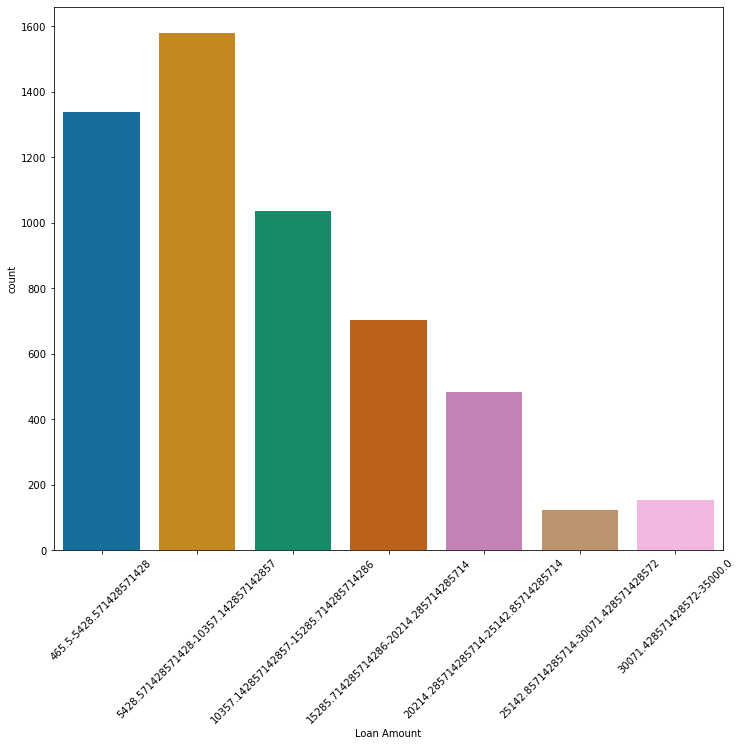

In [95]:
# plot Loan Amount
plt.figure(figsize=(12,10))
sns.countplot(x='loan_amnt_groups', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Loan Amount')
plt.tick_params(axis='x', rotation=45)

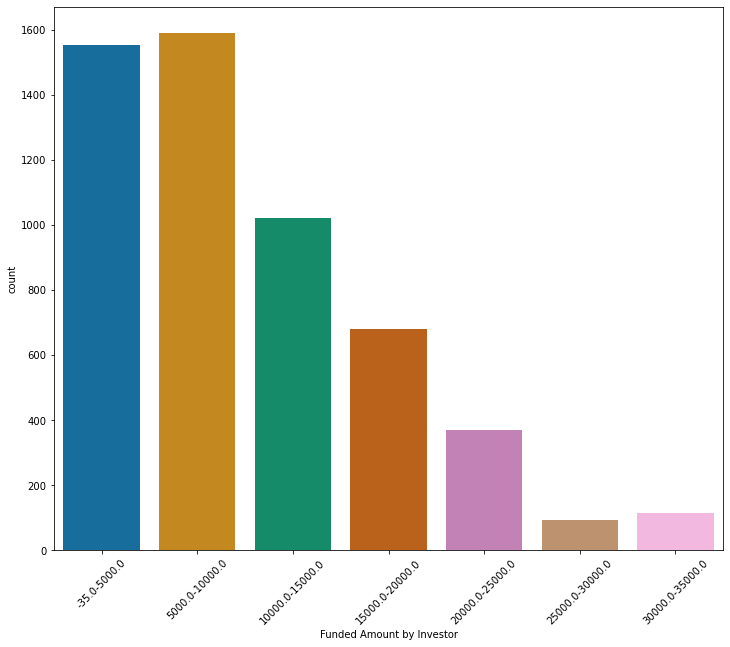

In [96]:
# plot Funded Amount by Investor
plt.figure(figsize=(12,10))
sns.countplot(x='funded_amnt_inv_group', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Funded Amount by Investor')
plt.tick_params(axis='x', rotation=45)

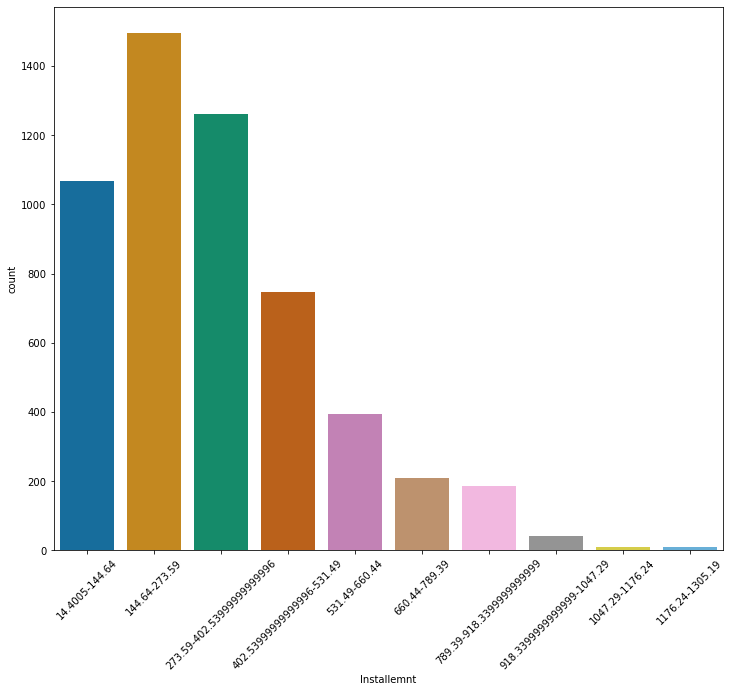

In [97]:
# plot Installemnt
plt.figure(figsize=(12,10))
sns.countplot(x='installment_groups', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Installemnt')
plt.tick_params(axis='x', rotation=45)

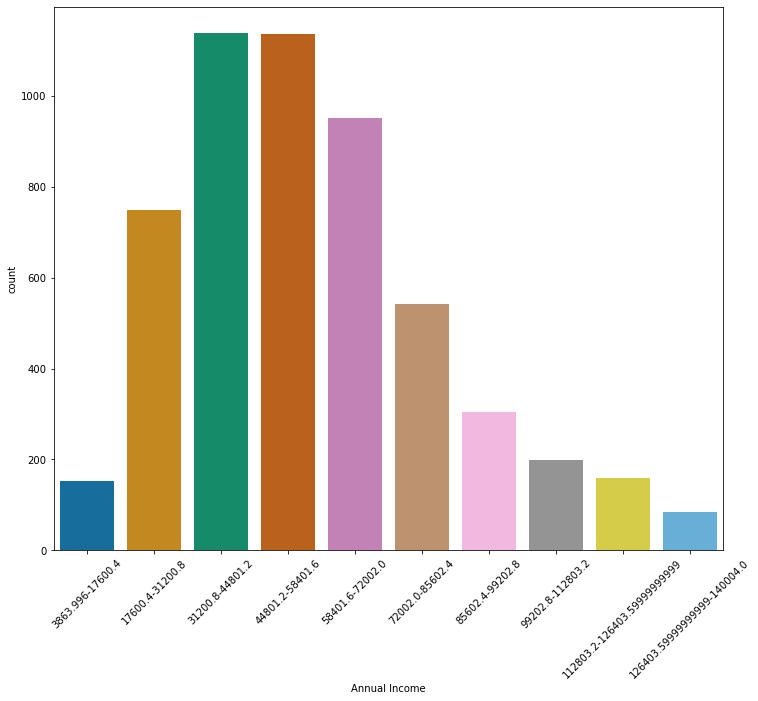

In [98]:
# plot Annual Income
plt.figure(figsize=(12,10))
sns.countplot(x='annual_inc_groups', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Annual Income')
plt.tick_params(axis='x', rotation=45)

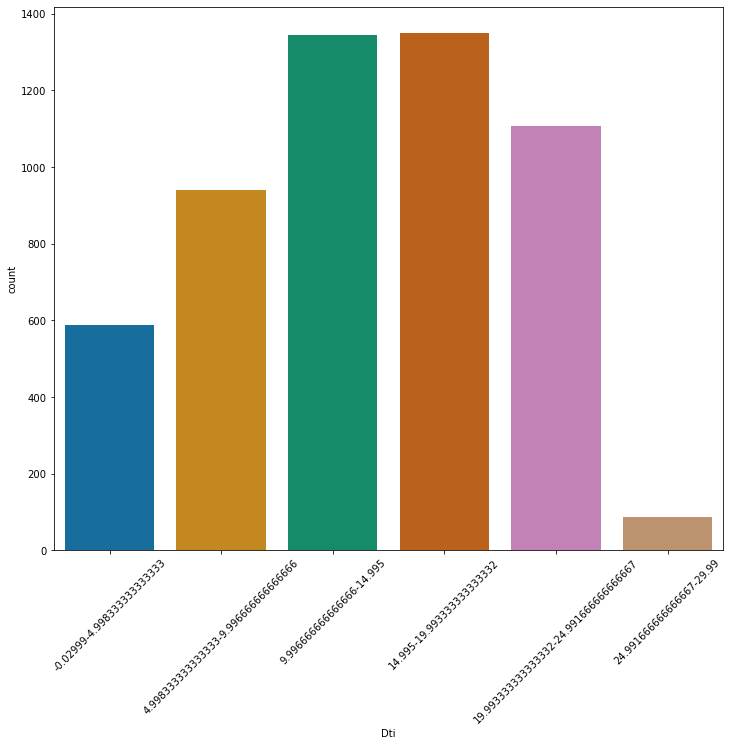

In [99]:
# plot Dti
plt.figure(figsize=(12,10))
sns.countplot(x='dti_groups', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Dti')
plt.tick_params(axis='x', rotation=45)

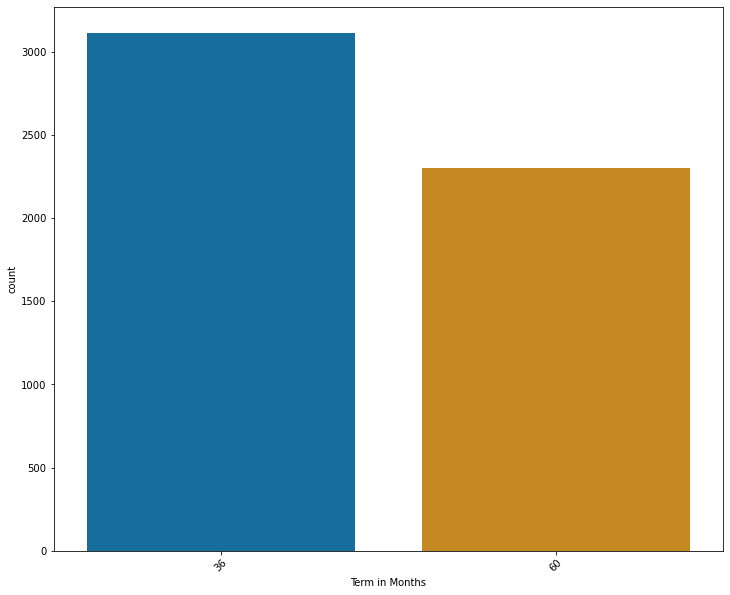

In [100]:
# plot Term in Months
plt.figure(figsize=(12,10))
sns.countplot(x='term_months', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Term in Months')
plt.tick_params(axis='x', rotation=45)

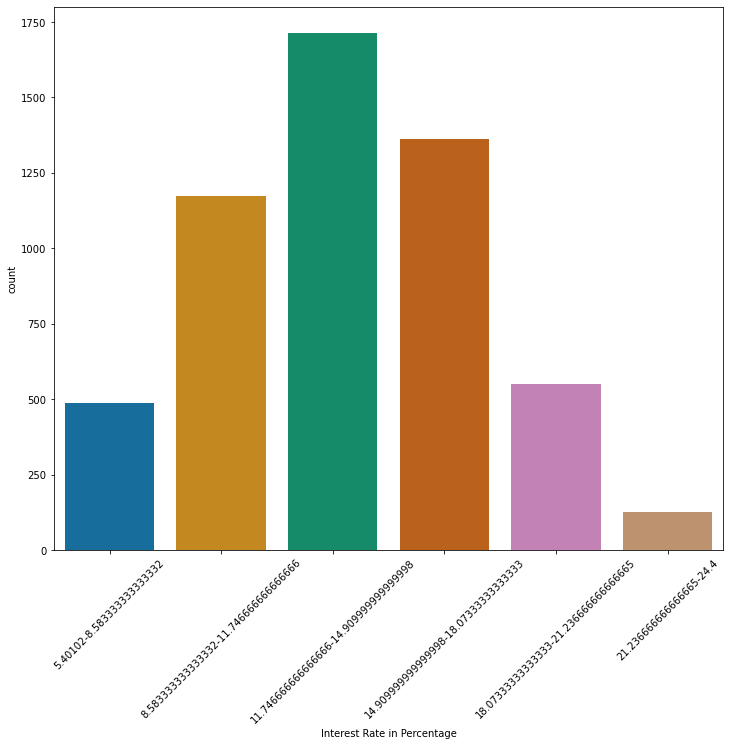

In [101]:
# plot Interest Rate in Percentage
plt.figure(figsize=(12,10))
sns.countplot(x='int_rate_groups', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Interest Rate in Percentage')
plt.tick_params(axis='x', rotation=45)

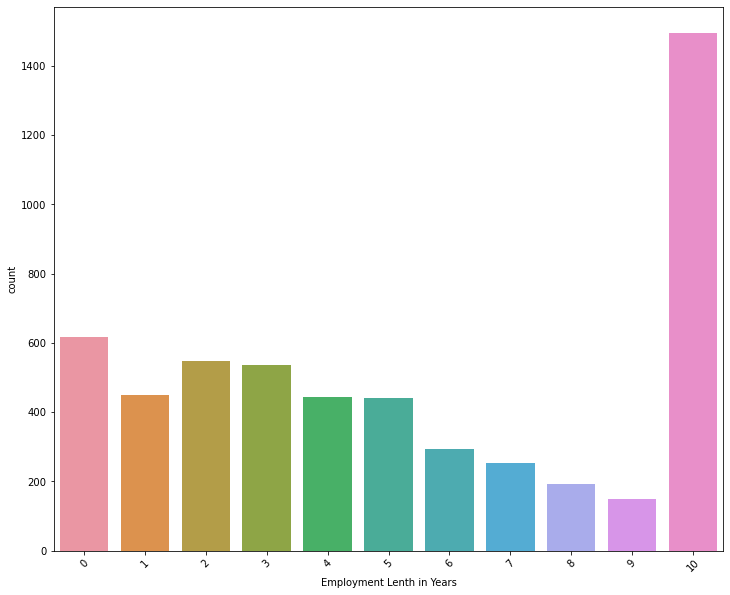

In [102]:
# plot Employment Lenth in Years
plt.figure(figsize=(12,10))
sns.countplot(x='emp_length', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.xlabel('Employment Lenth in Years')
plt.tick_params(axis='x', rotation=45)

###  Below are the observations from the Uni-Variate Analysis:
##### The analysis is with respect to the charged off loans. There is a more probability of defaulting when :
<br>Applicants is having Grade as 'B'
<br>Applicants is having a total grade of 'B5' level.
<br>Applicants is having house_ownership as 'RENT'
<br>Applicants loan status is Not verified
<br>Applicants purpose of loan is 'debt_consolidation'
<br>Applicants applied in the month of November and December
<br>Applicants applied in the year 2011
<br>Applicants loan amount is in the range of 5500-10000
<br> Applicants funded amount by investor is in the range of 5500-10000
<br>Applicants having installemts between 144-273
<br>Applicants with an annual income of range 31200 - 58402
<br>Applicants with Dti is between 10-20
<br>Applicants with Loan Tenure of of 36 months
<br>Applicants with interest of 11.7-15%
<br>Applicants with employement length of 10 or more years

# Bi-Variate Analysis

In [109]:
# get the columns
df_loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'term_months', 'int_rate_percent', 'emp_length',
       'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'last_pymnt_d', 'issue_month',
       'issue_year', 'loan_amnt_groups', 'funded_amnt_inv_group',
       'installment_groups', 'annual_inc_groups', 'dti_groups',
       'int_rate_groups'],
      dtype='object')

Plot the Loan Amount with respect to the other variables and analyse the results

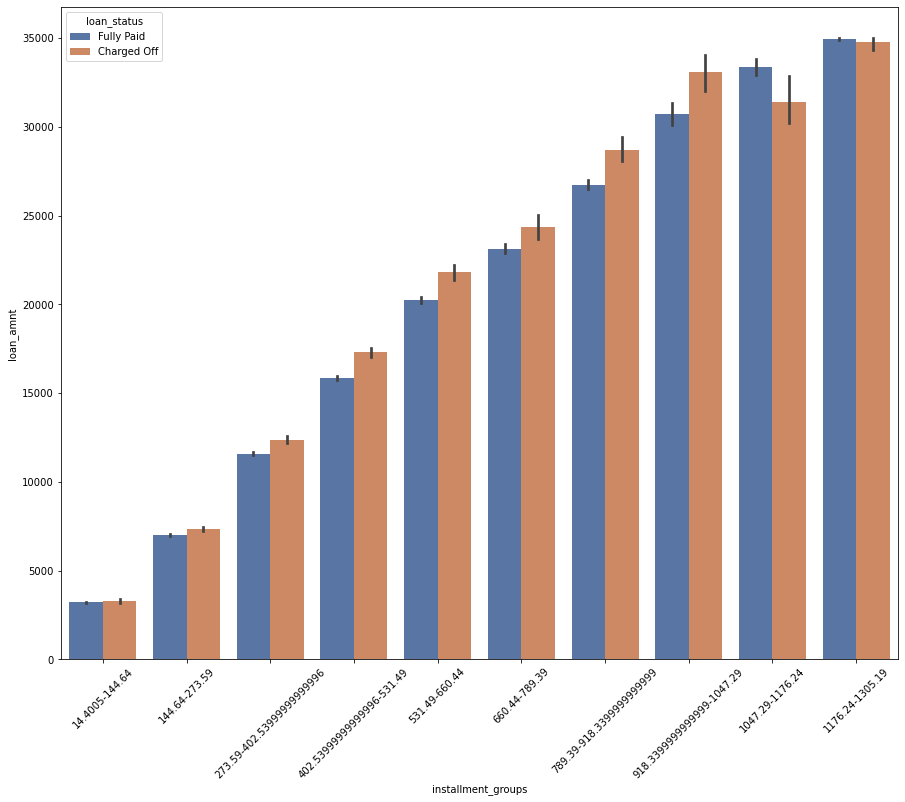

In [110]:
# plot installment Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data=df_loans, x='installment_groups', y='loan_amnt', hue='loan_status', palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

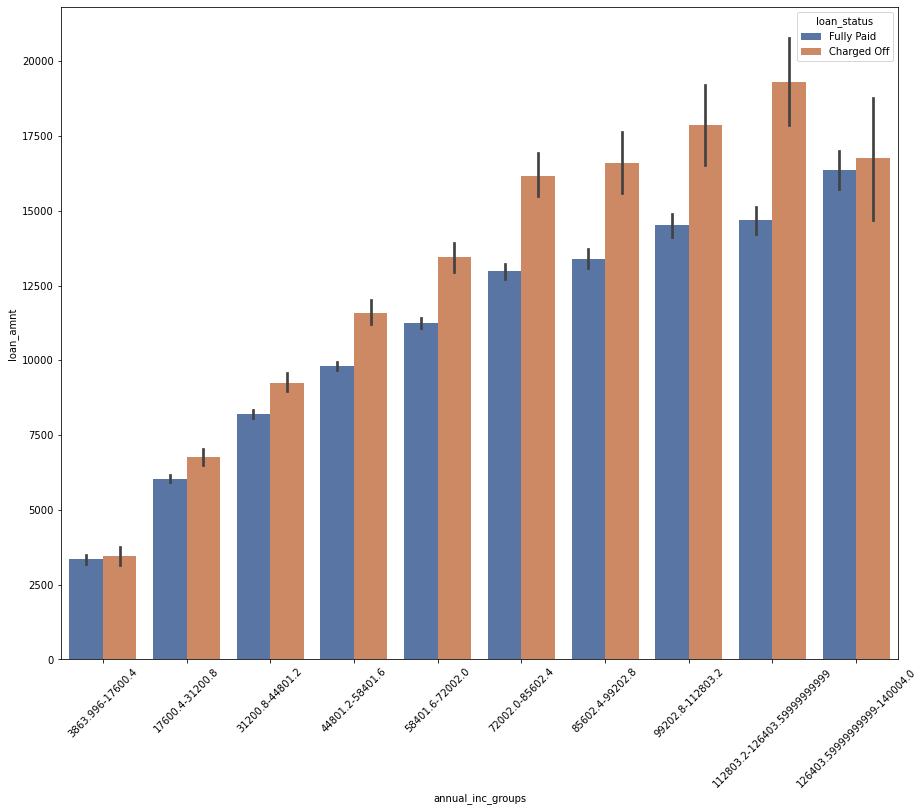

In [111]:
# plot annual_inc_groups Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data=df_loans, x='annual_inc_groups', y='loan_amnt', hue='loan_status', palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

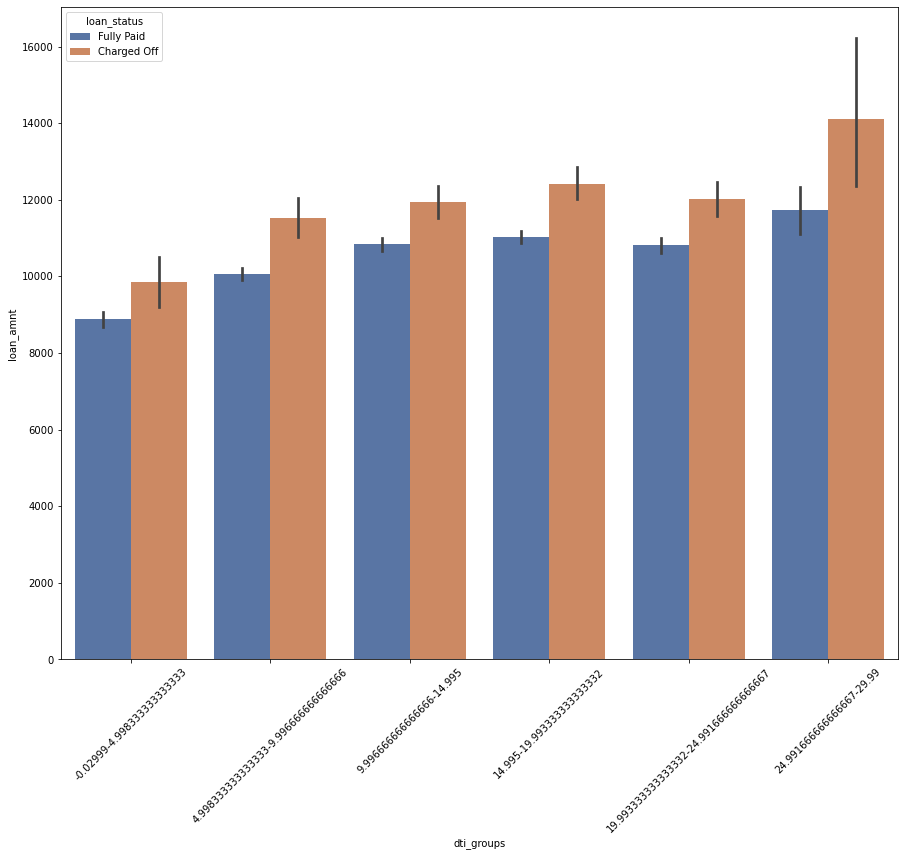

In [120]:
# plot dti_groups Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data=df_loans,x='dti_groups', y='loan_amnt', hue='loan_status', palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

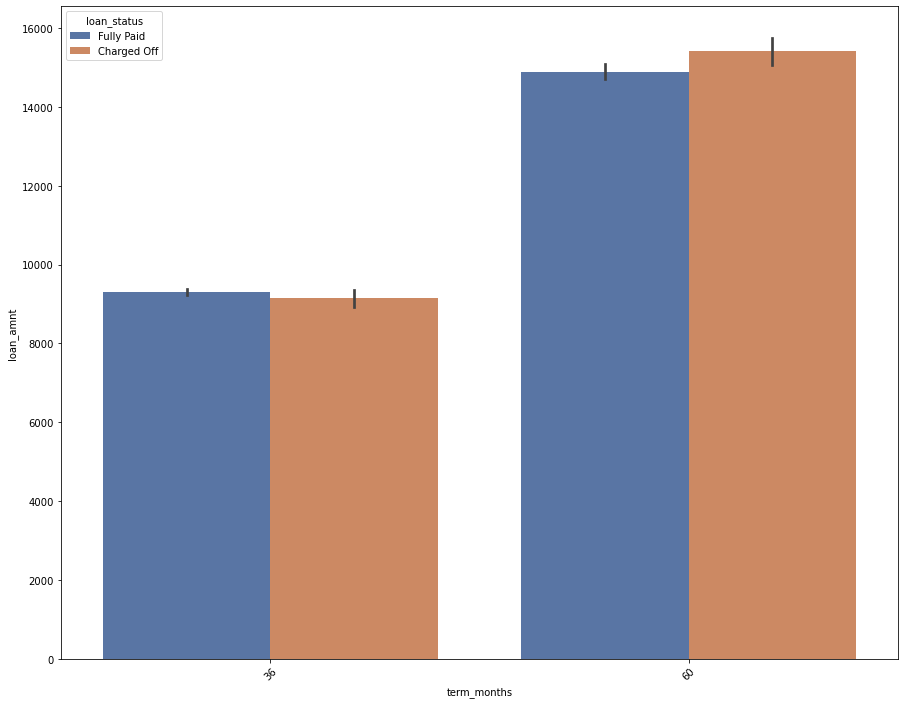

In [121]:
# plot term_months Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='term_months', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

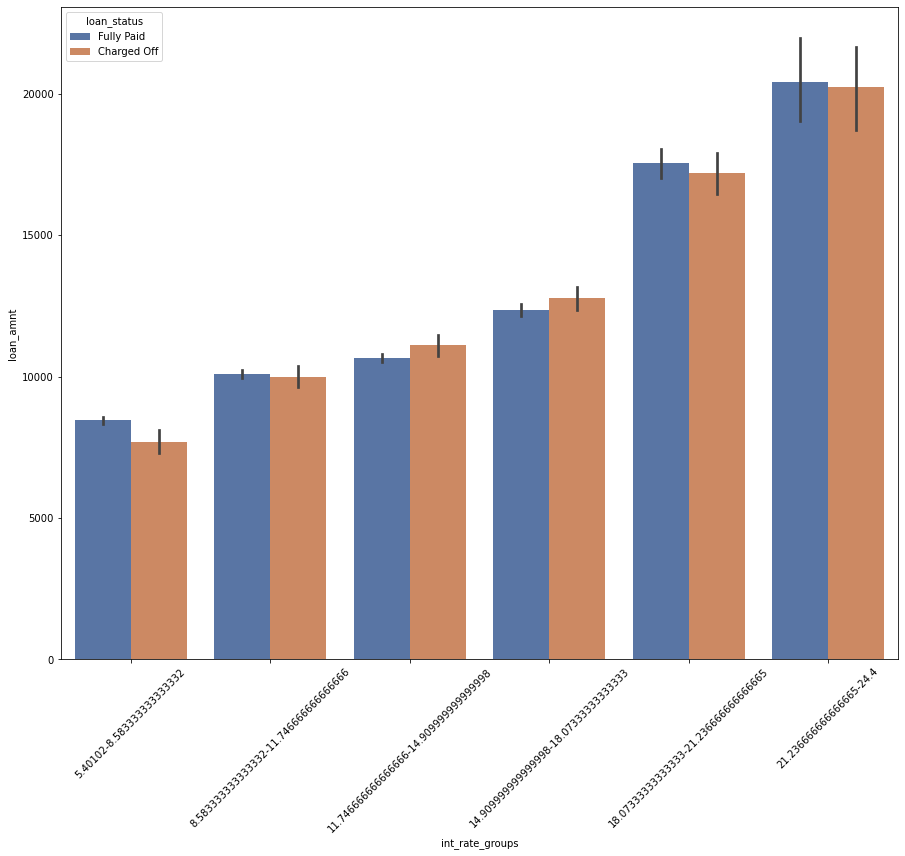

In [122]:
# plot int_rate_groups Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='int_rate_groups', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

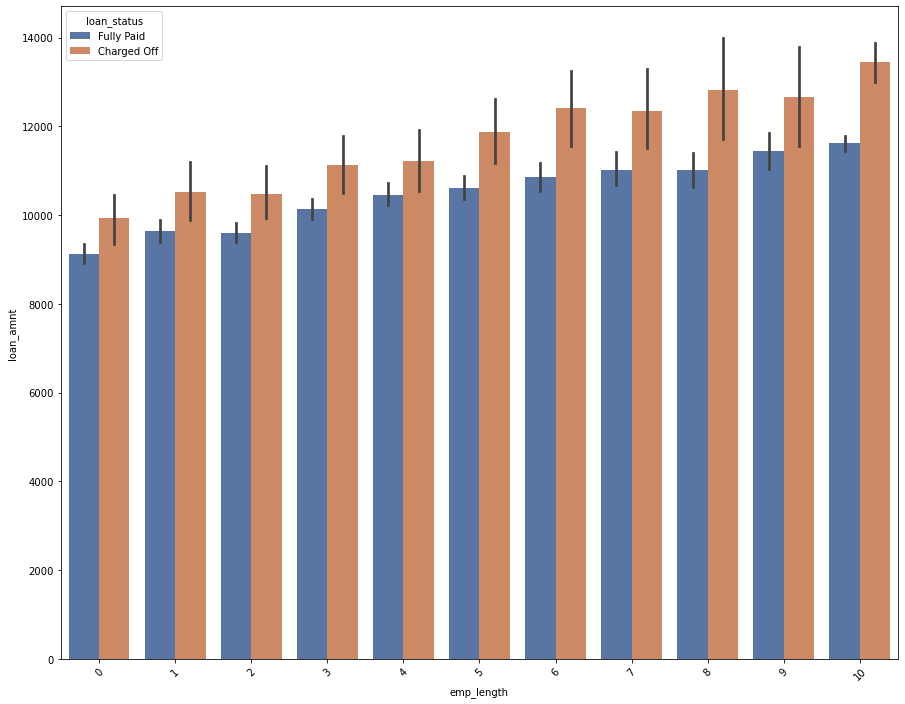

In [123]:
# plot emp_length Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='emp_length', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

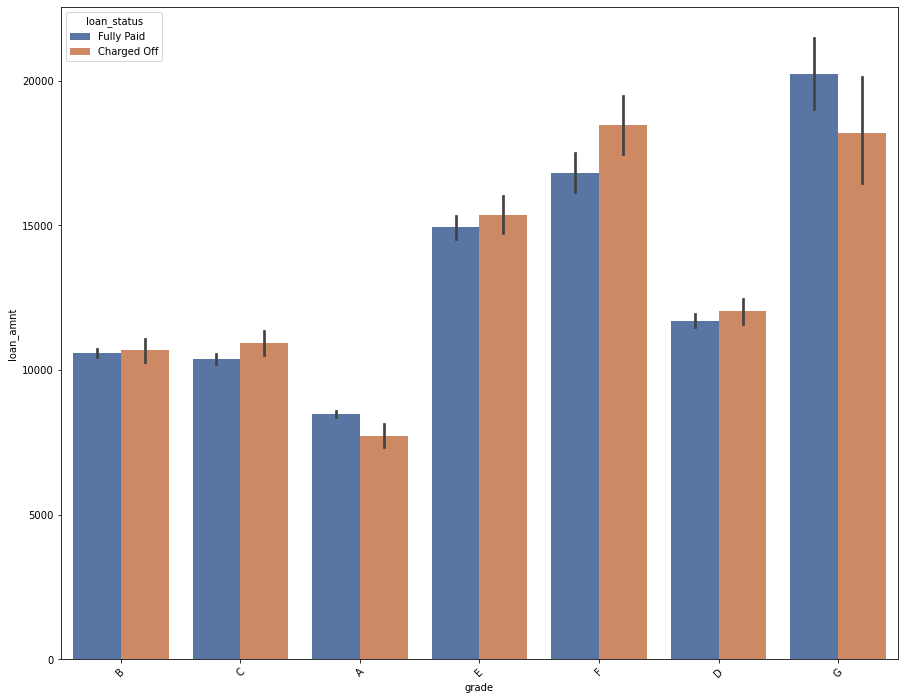

In [124]:
# plot grade Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='grade', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

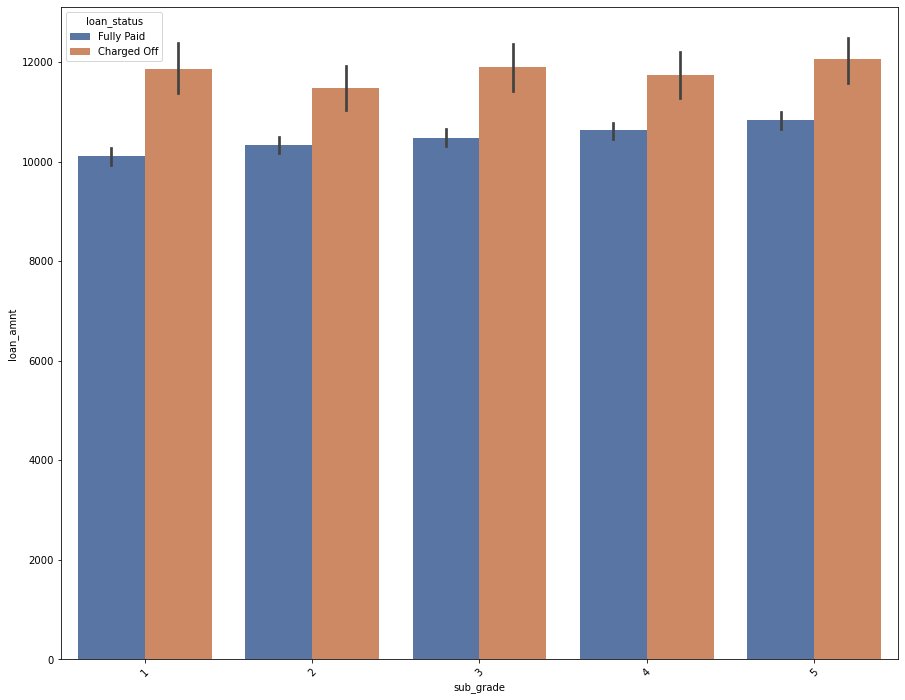

In [108]:
# plot sub_grade Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans, x='sub_grade', y='loan_amnt', hue='loan_status', palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

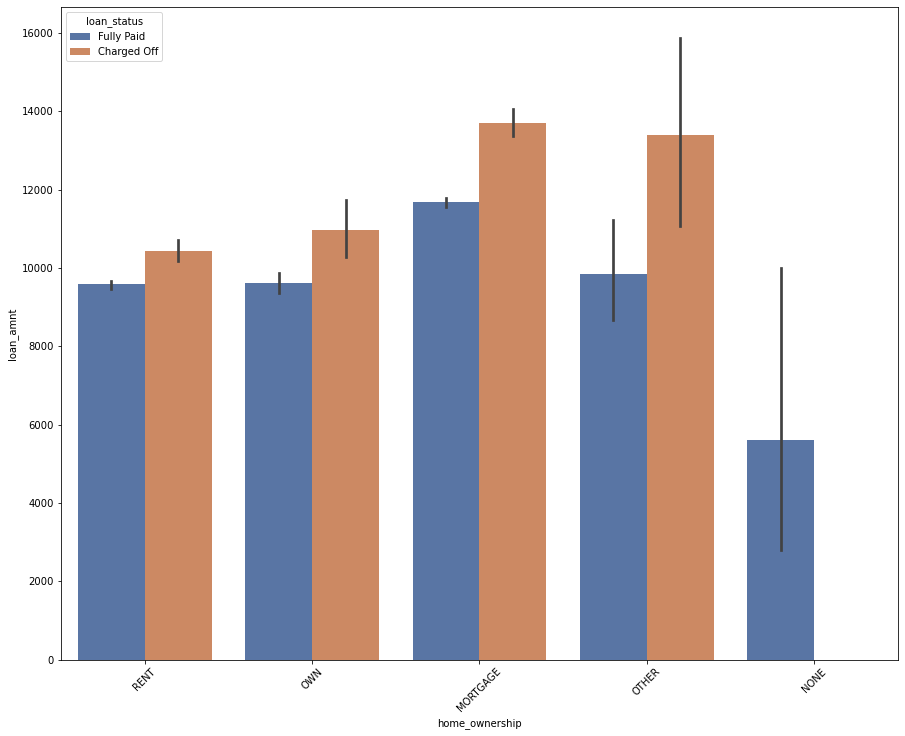

In [112]:
# plot home_ownership Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

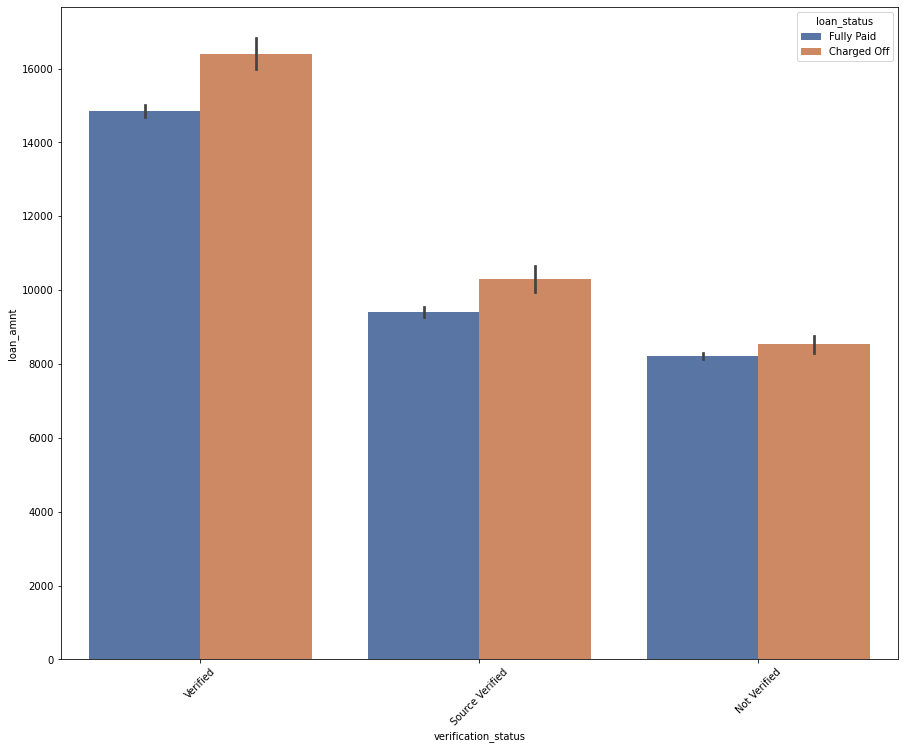

In [113]:
# plot verification_status Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='verification_status', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

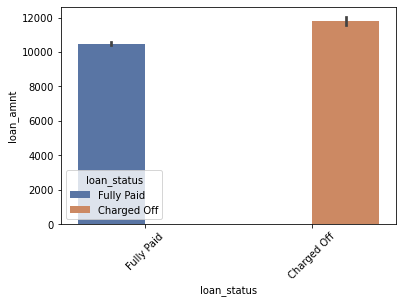

In [119]:
# plot loan_status Vs Loan Amount
sns.barplot(data =df_loans,x='loan_status', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

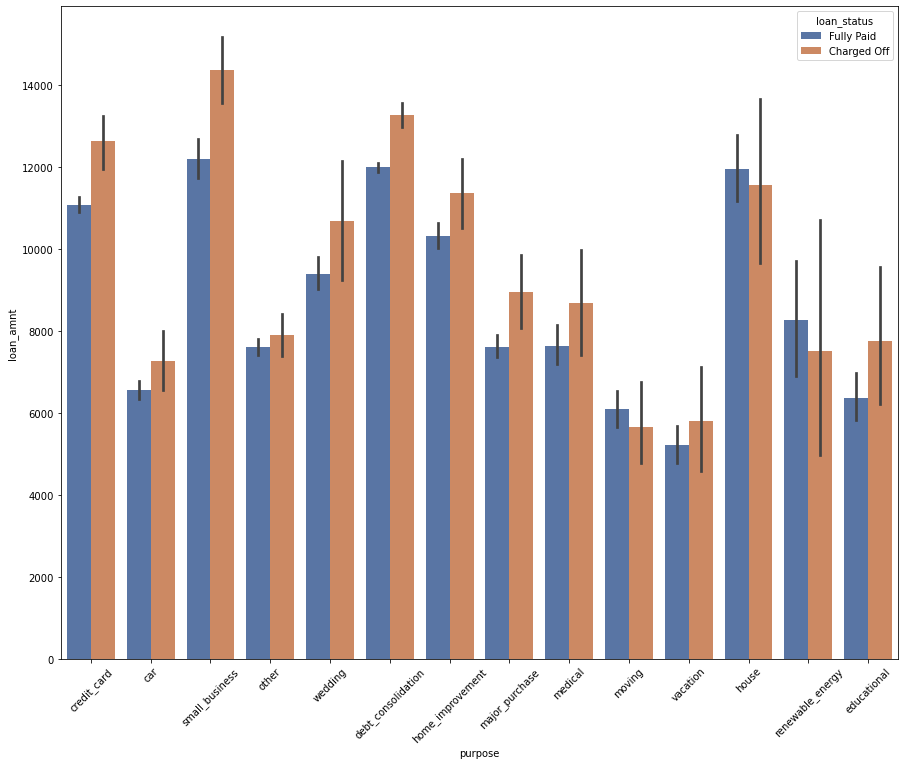

In [115]:
# plot purpose Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='purpose', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

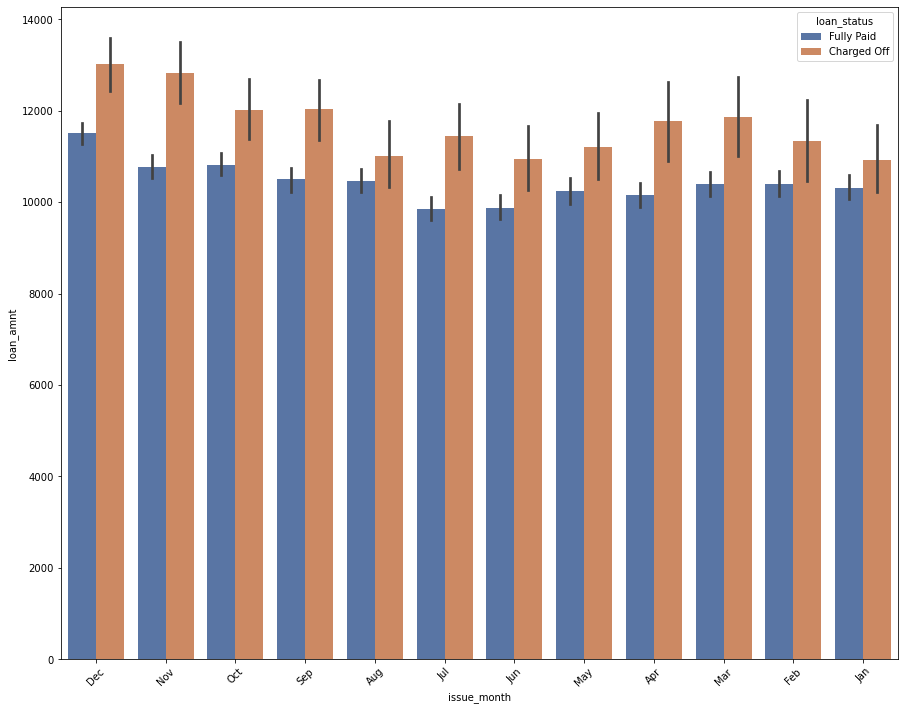

In [116]:
# plot issue_month Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='issue_month', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

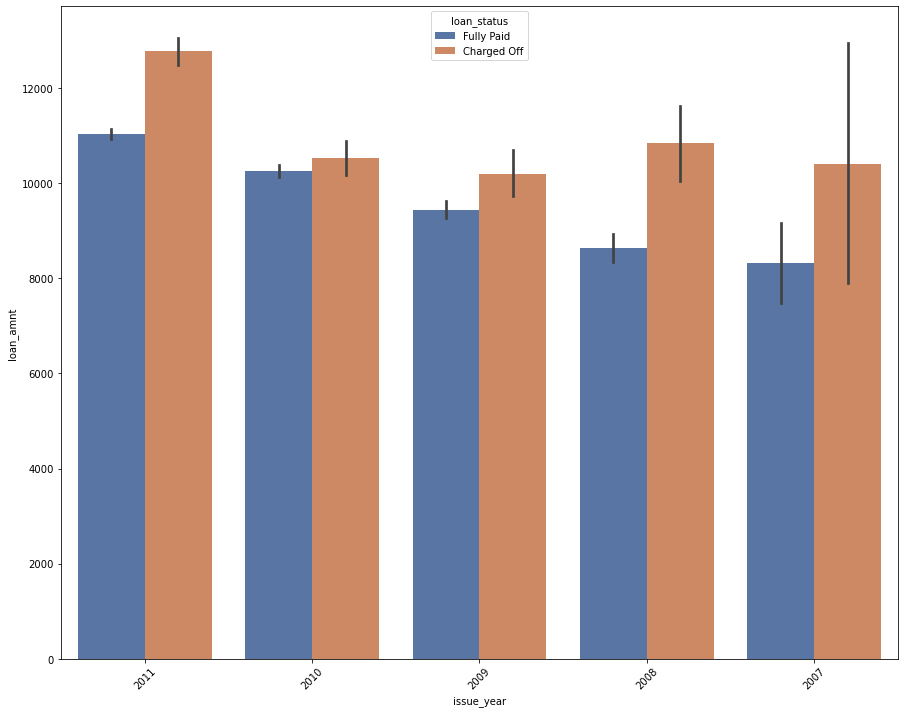

In [117]:
# plot issue_year Vs Loan Amount
plt.figure(figsize=(15,12))
sns.barplot(data =df_loans,x='issue_year', y='loan_amnt', hue ='loan_status',palette="deep")
plt.tick_params(axis='x', rotation=45)
plt.show()

###  Below are the observations from the Bi-Variate Analysis:
##### The analysis is with respect to the charged off loans. There is a more probability of defaulting when :
<br>Applicants who have taken loan amount in the range 30k-35k with installment range of 1176-1305
<br>Applicants who have taken loan amount  in the range 15k-20k with annual income range of 112k-126k
<br>Applicants who have taken loan amount  in the range 12k-14k with dti range of 25-30
<br>Applicants who have taken loan amount  in the range 14k-16k with loan term as 36 months
<br>Applicants who have taken loan amount  in the range 17k-23k with interest rate between 21-25%
<br>Applicants who have taken loan amount  in the range 12k-14k with emplotemnt length as 10 years or more
<br>Applicants who have taken loan amount  in the range 17k-20k with grade as F
<br>Applicants who have taken loan amount  in the range 12k-14k with home ownershi as mortgage
<br>Applicants who have taken loan amount  in the range 15k-17k with verification status as verified
<br>Applicants who have taken loan amount  in the range 12k-17k with purpose as small business
<br>Applicants who have taken loan amount  in the range 12k-14k with issue month of November and December